<a href="https://colab.research.google.com/github/elhamsh93/ml/blob/main/churned_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,biker_id,total_trips,last_trip_date,first_trip_date,avg_dist,avg_fare,avg_acceptance_time,delivered_rate,weekend_trips_prc,avg_time_between_orders,first_created_at,accepted_at,city,trips_in_first_7_days,dawn_trips,morning_trips,evening_trips,night_trips
0,1043,5,2022-09-24 15:54:08,2022-09-06 19:34:21,1.68,464720.00,508.80,0.60,20.00,4.25,2022-09-06 20:02:22,2022-09-06 20:02:44,T,2.00,0,0,4,1
1,13262,1,2022-09-09 16:28:17,2022-09-09 16:28:17,2.17,533800.00,979.00,1.00,100.00,NaN,2022-09-09 16:11:58,2022-09-09 16:28:17,G,1.00,0,0,1,0
2,14773,1,2022-09-18 21:01:55,2022-09-18 21:01:55,0.87,471000.00,516.00,1.00,0.00,NaN,2022-09-18 20:53:19,2022-09-18 21:01:55,T,NaN,0,0,0,1
3,17241,3,2022-09-06 19:24:01,2022-09-06 17:15:29,1.31,282600.00,318.00,1.00,0.00,14.00,2022-09-06 17:11:11,2022-09-06 17:15:29,Q,3.00,0,0,3,0
4,1052132,6,2022-09-16 14:24:39,2022-09-07 12:48:28,2.23,442216.67,374.33,1.00,50.00,1.80,2022-09-16 13:54:10,2022-09-16 14:05:05,T,3.00,0,0,5,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   biker_id                 1364 non-null   int64  
 1   total_trips              1364 non-null   int64  
 2   last_trip_date           1364 non-null   object 
 3   first_trip_date          1364 non-null   object 
 4   avg_dist                 1364 non-null   float64
 5   avg_fare                 1364 non-null   float64
 6   avg_acceptance_time      1364 non-null   float64
 7   delivered_rate           1364 non-null   float64
 8   weekend_trips_prc        1364 non-null   float64
 9   avg_time_between_orders  1260 non-null   float64
 10  first_created_at         1364 non-null   object 
 11  accepted_at              1364 non-null   object 
 12  city                     1364 non-null   object 
 13  trips_in_first_7_days    1067 non-null   float64
 14  dawn_trips              

**Clean Data**

In [ ]:
df['trips_in_first_7_days'] = df['trips_in_first_7_days'].fillna(0)
df['avg_time_between_orders'] = df['avg_time_between_orders'].fillna(0)

df['trips_in_first_7_days'] = df['trips_in_first_7_days'].astype('int64')
## Converting to Datetime
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])
df['first_trip_date']=pd.to_datetime(df['first_trip_date'])
df.head()

,biker_id,total_trips,last_trip_date,first_trip_date,avg_dist,avg_fare,avg_acceptance_time,delivered_rate,weekend_trips_prc,avg_time_between_orders,first_created_at,accepted_at,city,trips_in_first_7_days,dawn_trips,morning_trips,evening_trips,night_trips
0,1043,5,2022-09-24 15:54:08,2022-09-06 19:34:21,1.68,464720.00,508.80,0.60,20.00,4.25,2022-09-06 20:02:22,2022-09-06 20:02:44,T,2,0,0,4,1
1,13262,1,2022-09-09 16:28:17,2022-09-09 16:28:17,2.17,533800.00,979.00,1.00,100.00,0.00,2022-09-09 16:11:58,2022-09-09 16:28:17,G,1,0,0,1,0
2,14773,1,2022-09-18 21:01:55,2022-09-18 21:01:55,0.87,471000.00,516.00,1.00,0.00,0.00,2022-09-18 20:53:19,2022-09-18 21:01:55,T,0,0,0,0,1
3,17241,3,2022-09-06 19:24:01,2022-09-06 17:15:29,1.31,282600.00,318.00,1.00,0.00,14.00,2022-09-06 17:11:11,2022-09-06 17:15:29,Q,3,0,0,3,0
4,1052132,6,2022-09-16 14:24:39,2022-09-07 12:48:28,2.23,442216.67,374.33,1.00,50.00,1.80,2022-09-16 13:54:10,2022-09-16 14:05:05,T,3,0,0,5,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   biker_id                 1364 non-null   int64         
 1   total_trips              1364 non-null   int64         
 2   last_trip_date           1364 non-null   datetime64[ns]
 3   first_trip_date          1364 non-null   datetime64[ns]
 4   avg_dist                 1364 non-null   float64       
 5   avg_fare                 1364 non-null   float64       
 6   avg_acceptance_time      1364 non-null   float64       
 7   delivered_rate           1364 non-null   float64       
 8   weekend_trips_prc        1364 non-null   float64       
 9   avg_time_between_orders  1364 non-null   float64       
 10  first_created_at         1364 non-null   object        
 11  accepted_at              1364 non-null   object        
 12  city                     1364 non-

In [ ]:
# Drop the duplicate rows
df=df.drop_duplicates()
# Drop biker_id
del df['biker_id']
del df['first_created_at']
del df['accepted_at']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_trips              1364 non-null   int64         
 1   last_trip_date           1364 non-null   datetime64[ns]
 2   first_trip_date          1364 non-null   datetime64[ns]
 3   avg_dist                 1364 non-null   float64       
 4   avg_fare                 1364 non-null   float64       
 5   avg_acceptance_time      1364 non-null   float64       
 6   delivered_rate           1364 non-null   float64       
 7   weekend_trips_prc        1364 non-null   float64       
 8   avg_time_between_orders  1364 non-null   float64       
 9   city                     1364 non-null   object        
 10  trips_in_first_7_days    1364 non-null   int64         
 11  dawn_trips               1364 non-null   int64         
 12  morning_trips            1364 non-

In [ ]:
# Check the Max and Min Date
df['last_trip_date'].min(), df['last_trip_date'].max()

(Timestamp('2022-09-06 17:08:07'), Timestamp('2022-09-26 16:26:04'))

In [ ]:
# Check the Max and Min Date
df['first_trip_date'].min(), df['first_trip_date'].max()

(Timestamp('2022-09-06 16:35:07'), Timestamp('2022-09-26 16:13:16'))

In [ ]:
df = df.drop(df[(df.first_trip_date > '2022-09-20 00:00:01')].index)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 0 to 1362
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_trips              1256 non-null   int64         
 1   last_trip_date           1256 non-null   datetime64[ns]
 2   first_trip_date          1256 non-null   datetime64[ns]
 3   avg_dist                 1256 non-null   float64       
 4   avg_fare                 1256 non-null   float64       
 5   avg_acceptance_time      1256 non-null   float64       
 6   delivered_rate           1256 non-null   float64       
 7   weekend_trips_prc        1256 non-null   float64       
 8   avg_time_between_orders  1256 non-null   float64       
 9   city                     1256 non-null   object        
 10  trips_in_first_7_days    1256 non-null   int64         
 11  dawn_trips               1256 non-null   int64         
 12  morning_trips            1256 non-

Removed bikers whose first trip was in the last 7 days, because we can not decide whether they are churned or not.  

In [ ]:
df['churn'] = np.where(df['last_trip_date']<'2022-09-20 00:00:01', 1, 0)
df.head()

,total_trips,last_trip_date,first_trip_date,avg_dist,avg_fare,avg_acceptance_time,delivered_rate,weekend_trips_prc,avg_time_between_orders,city,trips_in_first_7_days,dawn_trips,morning_trips,evening_trips,night_trips,churn
0,5,2022-09-24 15:54:08,2022-09-06 19:34:21,1.68,464720.00,508.80,0.60,20.00,4.25,T,2,0,0,4,1,0
1,1,2022-09-09 16:28:17,2022-09-09 16:28:17,2.17,533800.00,979.00,1.00,100.00,0.00,G,1,0,0,1,0,1
2,1,2022-09-18 21:01:55,2022-09-18 21:01:55,0.87,471000.00,516.00,1.00,0.00,0.00,T,0,0,0,0,1,1
3,3,2022-09-06 19:24:01,2022-09-06 17:15:29,1.31,282600.00,318.00,1.00,0.00,14.00,Q,3,0,0,3,0,1
4,6,2022-09-16 14:24:39,2022-09-07 12:48:28,2.23,442216.67,374.33,1.00,50.00,1.80,T,3,0,0,5,1,1


Add label churn if user has not been active in recent 7 days we consider it as churned(1) otherwise not churned(0) 

**Visualizing Customer Churn**

**Churn Total Count**

69.188 % of bikers stayed.
30.812 % of bikers left.


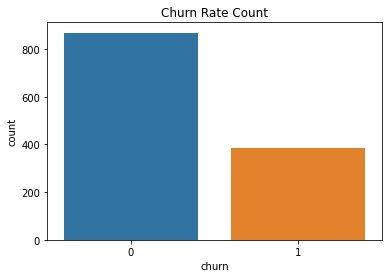

In [ ]:
# Create a bar graph of our count:
sns.countplot(data=df, x='churn').set(title="Churn Rate Count")

NO = df['churn'] == 0
YES = df['churn'] == 1

num_retained = df[NO].shape[0]
num_churned = df[YES].shape[0]

# Percentage of biker that have stayed vs. those who've left:
retain_rate = num_retained/(num_churned + num_retained) * 100
churn_rate = num_churned/(num_churned + num_retained) * 100

print(round(retain_rate, 3), "% of bikers stayed.")
print(round(churn_rate, 3), "% of bikers left.")

In [ ]:
# Missing Data Percentage

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
total_trips,0,0.00
last_trip_date,0,0.00
first_trip_date,0,0.00
avg_dist,0,0.00
avg_fare,0,0.00
avg_acceptance_time,0,0.00
delivered_rate,0,0.00
weekend_trips_prc,0,0.00
avg_time_between_orders,0,0.00
city,0,0.00


In [ ]:
df['city'].value_counts(normalize=True)

T   0.50
G   0.21
Y   0.15
Q   0.14
Name: city, dtype: float64

Now there are no missing values in the dataset

**Exploratory Data Analysis**

**Numerical Features**

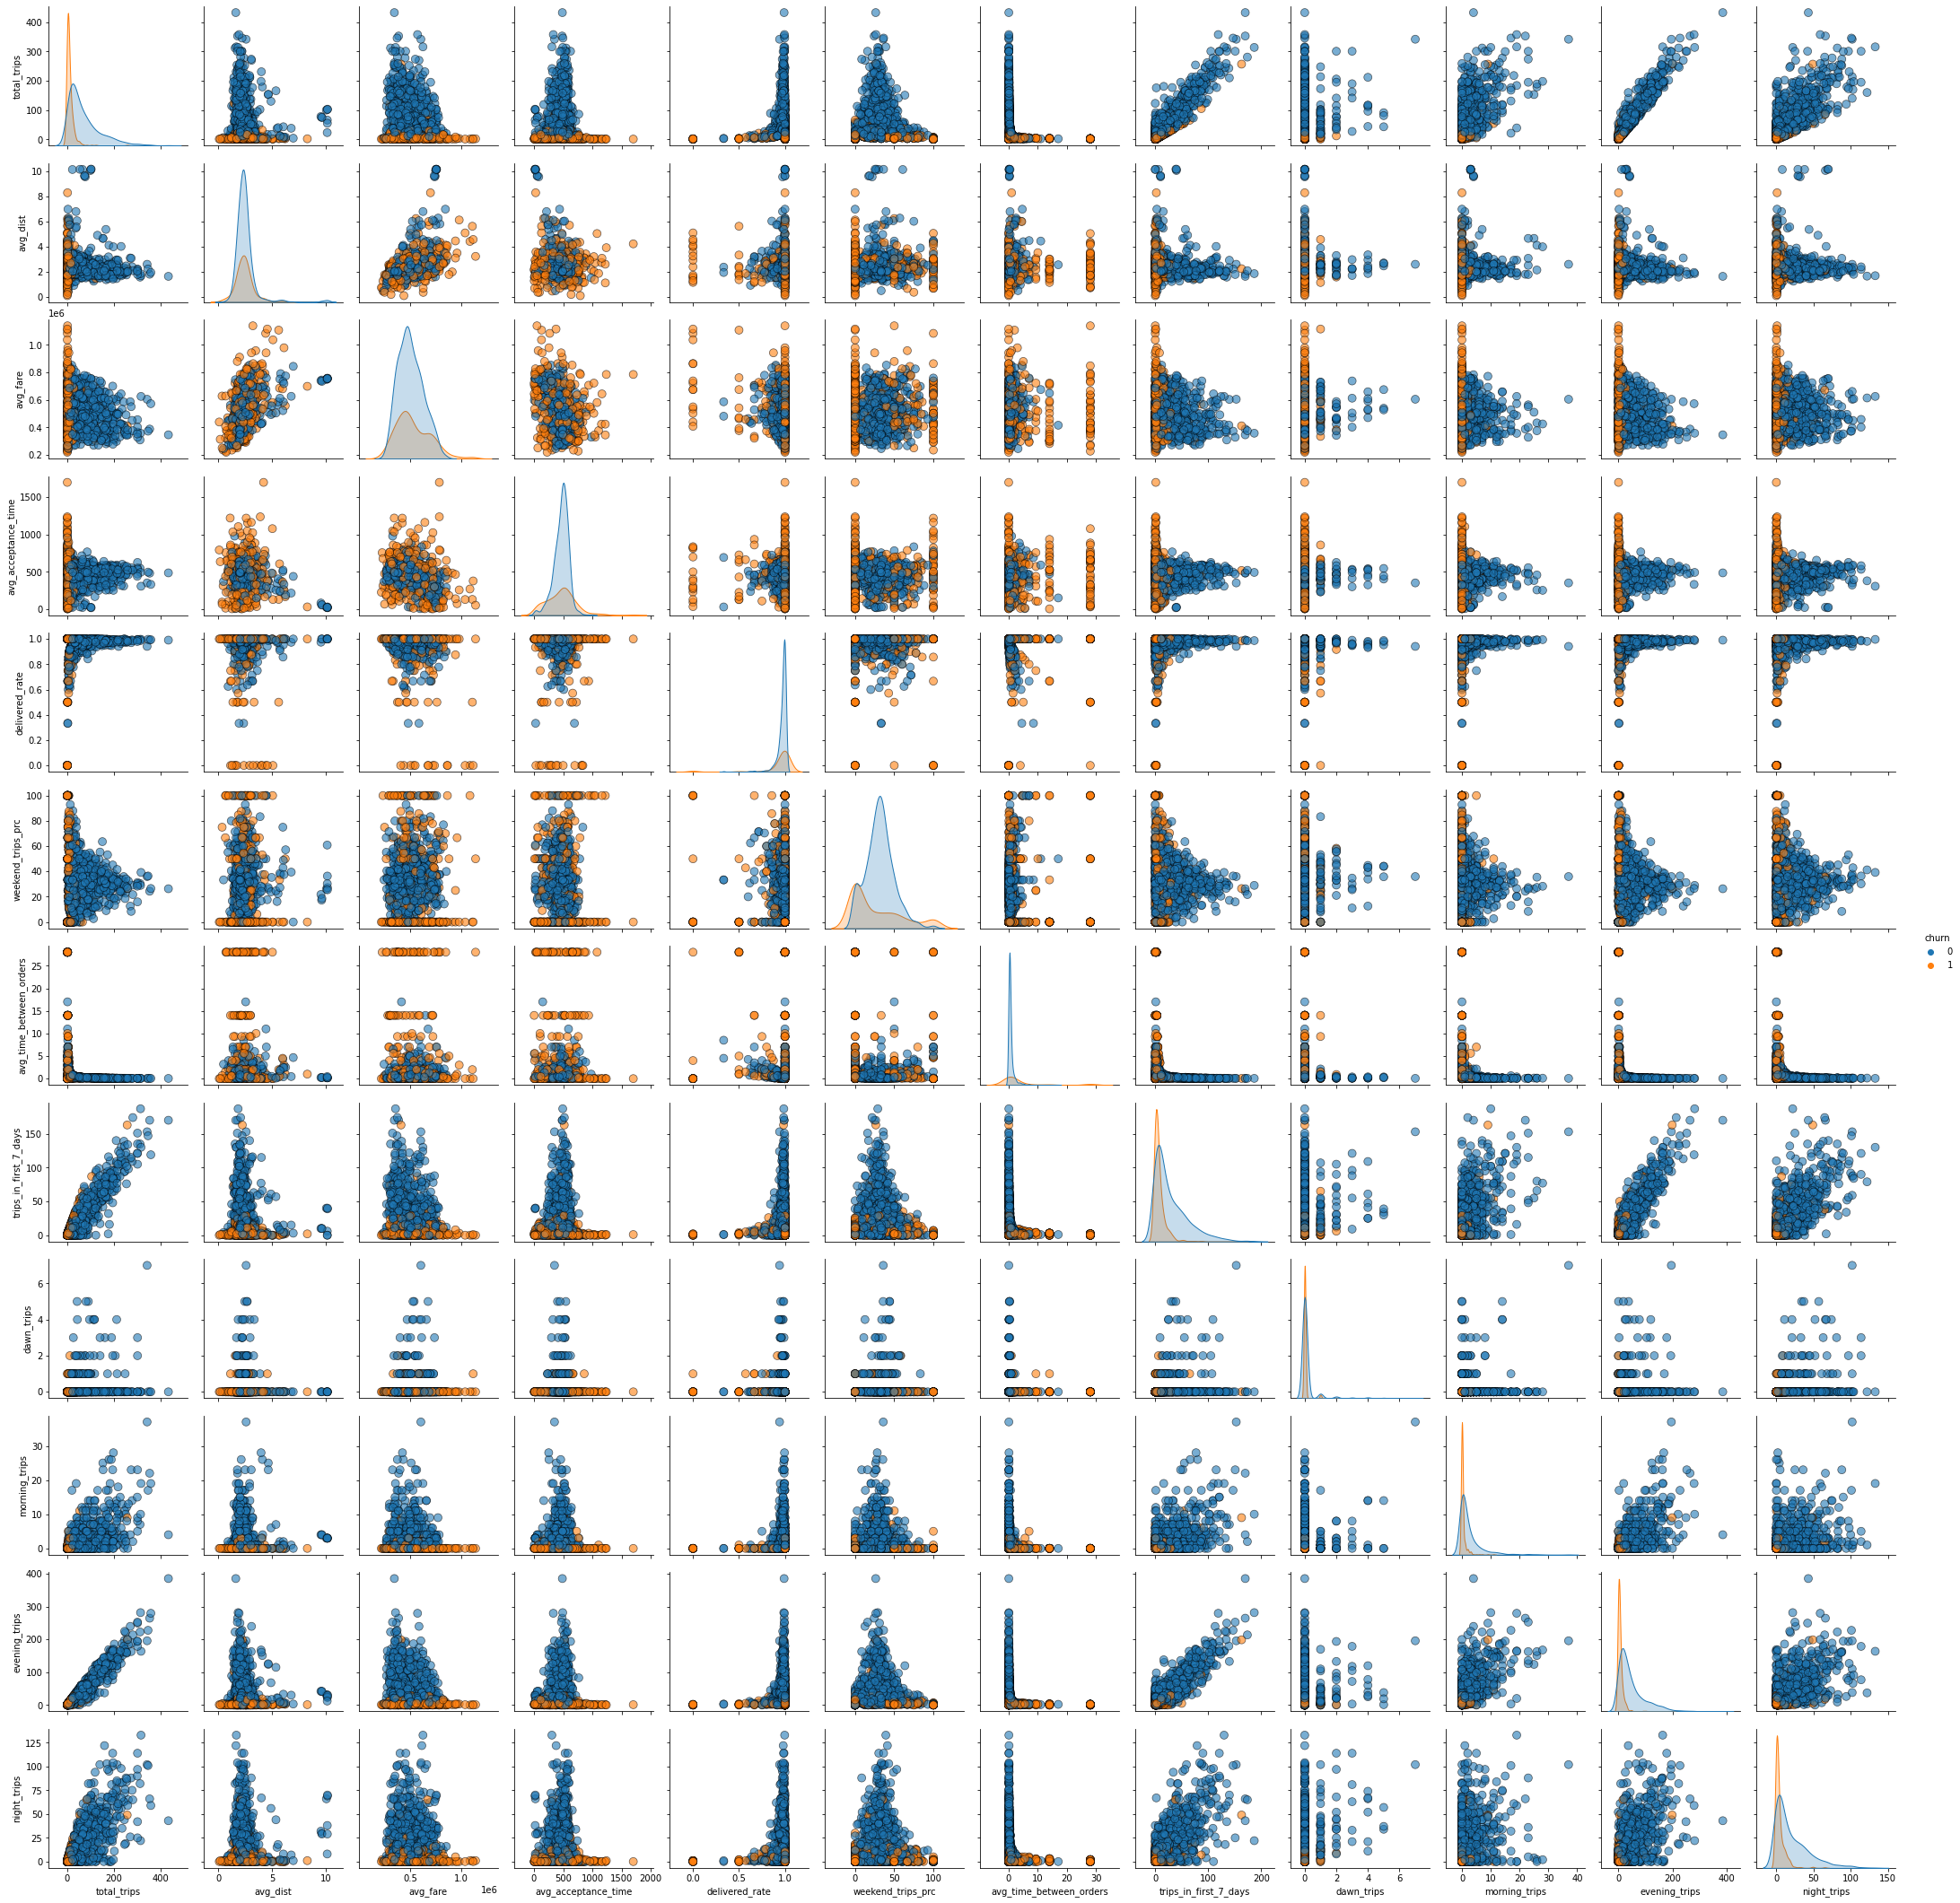

In [ ]:
sns.pairplot(df, hue='churn',diag_kind="kde",
             plot_kws = {'alpha':0.6,
                         's': 80,
                         'edgecolor':'k'}
          )



*   Linearly correlated features:
     1.total_trips and trips_in_first_7_days 
     2.total_trips and evening_trips
     3.trips_in_first_7_days and evening_trips




 **Plot features to Examine potential**

<AxesSubplot:xlabel='total_trips', ylabel='trips_in_first_7_days'>

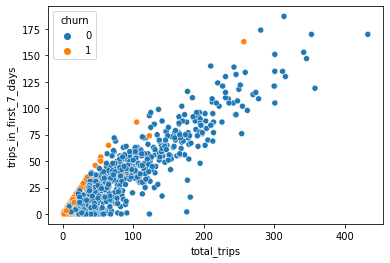

In [ ]:
sns.scatterplot(data=df, x="total_trips", y="trips_in_first_7_days", hue="churn")

<AxesSubplot:xlabel='total_trips', ylabel='evening_trips'>

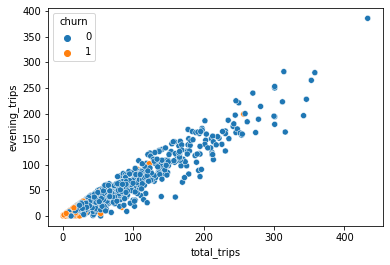

In [ ]:
sns.scatterplot(data=df, x="total_trips", y="evening_trips", hue="churn")

<AxesSubplot:xlabel='trips_in_first_7_days', ylabel='evening_trips'>

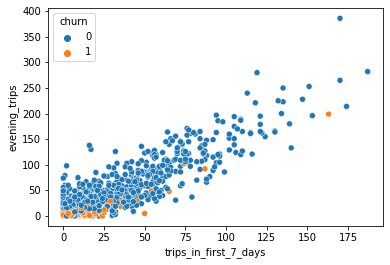

In [ ]:
sns.scatterplot(data=df, x="trips_in_first_7_days", y="evening_trips", hue="churn")

 We can see that most bikers trips shorter paths to longer paths.

<AxesSubplot:xlabel='churn', ylabel='evening_trips'>

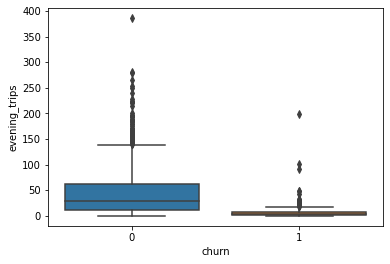

In [ ]:
sns.boxplot(x="churn", y="evening_trips", data=df)

We can say that on average if the users take less trips in the evening, they will churn for the most cases.

<AxesSubplot:xlabel='churn', ylabel='trips_in_first_7_days'>

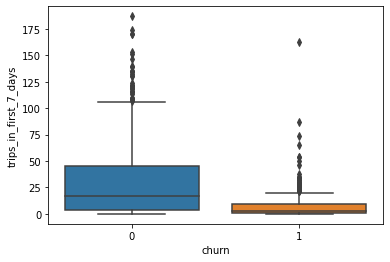

In [ ]:
sns.boxplot(x="churn", y="trips_in_first_7_days", data=df)

<AxesSubplot:xlabel='churn', ylabel='avg_time_between_orders'>

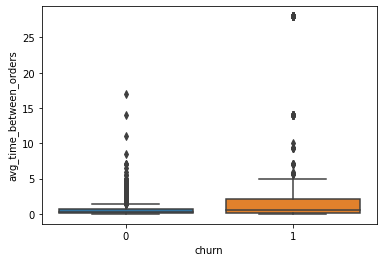

In [ ]:
sns.boxplot(x="churn", y="avg_time_between_orders", data=df)

We can see for not churned users the maximum average time between two orders is about 17 days .

We can say that on average if the users take less trips in the first 7 days, they will churn for the most cases.

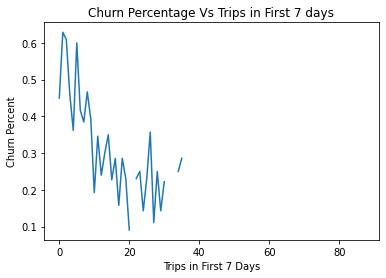

In [ ]:
trips_df=pd.pivot_table(data=df, columns=['churn'], index='trips_in_first_7_days', values='city',aggfunc='count')
trips_df['Percent']=trips_df[1]/(trips_df[0]+ trips_df[1])

plt.plot(trips_df['Percent'])
plt.xlabel('Trips in First 7 Days')
plt.ylabel('Churn Percent')
plt.title('Churn Percentage Vs Trips in First 7 days')
plt.show();

We can see that as the trips in first 7 days decline, the churn percentage also seems to decline atleast very rapidly in the beginning. So this indicates that this may be an important feature to consider while modelling

<AxesSubplot:xlabel='weekend_trips_prc', ylabel='trips_in_first_7_days'>

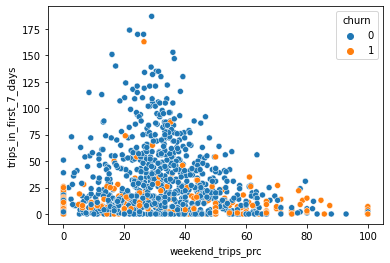

In [ ]:
sns.scatterplot(data=df, x="weekend_trips_prc", y="trips_in_first_7_days", hue="churn")

This plot shows that the trips taken in the first 7 days is more when people order more in the weekdays. This is true because more weekdays bikers use them regularly for work and hence more trips taken by them.

<AxesSubplot:xlabel='churn', ylabel='weekend_trips_prc'>

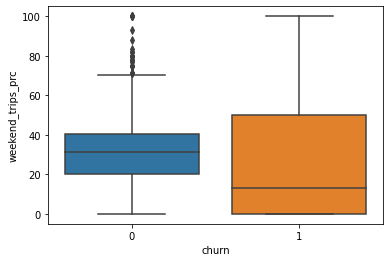

In [ ]:
sns.boxplot(x="churn", y="weekend_trips_prc", data=df)

we can see that not churned users in general have a below average weekend percent. But that doesnt mean all low weekend bikers would not be churned.

In [ ]:
#Categorical and Boolean Features
df.select_dtypes(include=["object",'bool']).columns

Index(['city'], dtype='object')

<AxesSubplot:xlabel='city', ylabel='Count'>

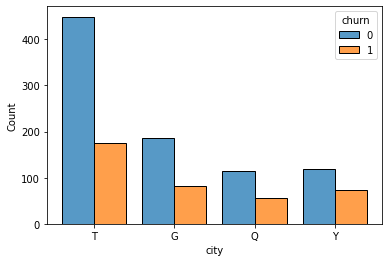

In [ ]:
sns.histplot(data=df, x="city", hue="churn",multiple="dodge", shrink=.8)

We can see in all cities, the number of not churned bikers are more compared to the churned bikers.

<AxesSubplot:xlabel='city', ylabel='weekend_trips_prc'>

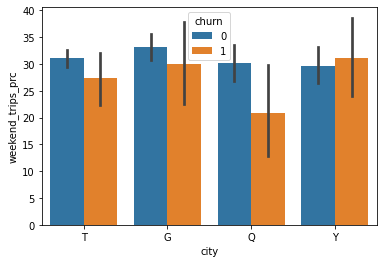

In [ ]:
sns.barplot(x="city", y="weekend_trips_prc", hue="churn", data=df)

There are more users(churned and not churned users) who use the bikes in Weekdays in Q compared to other places.



<AxesSubplot:xlabel='first_trip_date'>

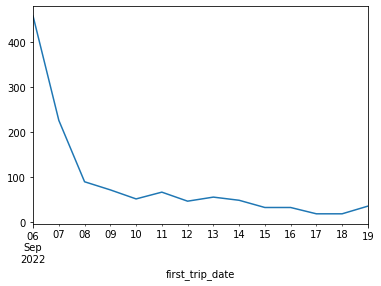

In [ ]:
df_timestamp = df[['last_trip_date', 'first_trip_date']].copy()
df_timestamp['count'] = 1
df_timestamp = df_timestamp.set_index('first_trip_date')
df_timestamp['count'].resample("1D").sum().plot()

The first trip dates are the highest in the begining of september.
I removed first trips after 20th because of their unkonwn churn status.

<AxesSubplot:xlabel='last_trip_date'>

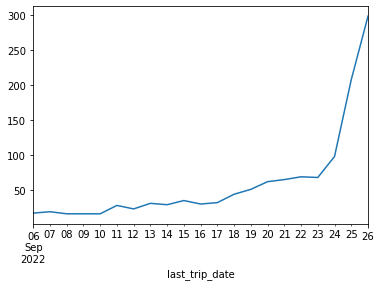

In [ ]:
df_timestamp = df_timestamp.set_index('last_trip_date')
df_timestamp['count'].resample("1D").sum().plot()

Counts of last trip date significantly increase.

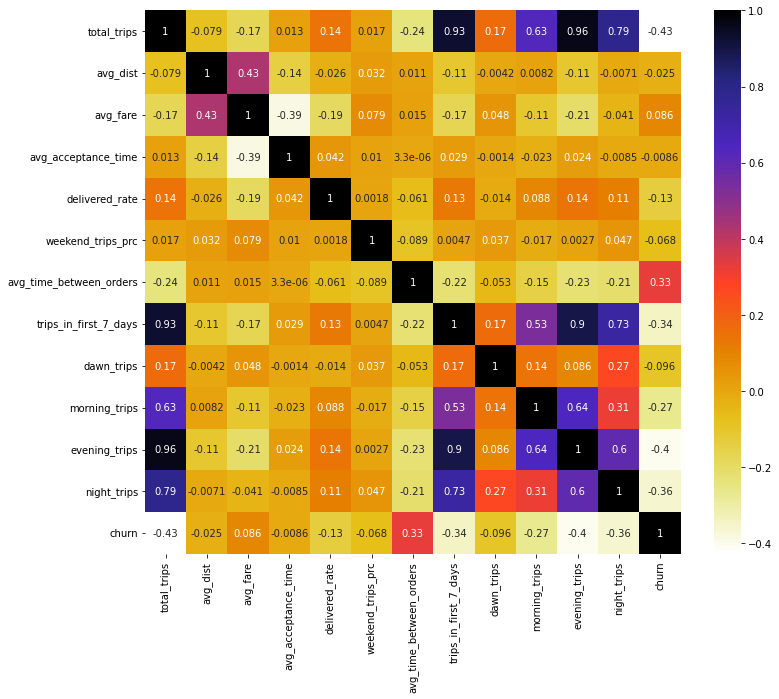

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Churn is correlated with  total_trips, evening_trips, night_trips, trips_in_first_7_days, avg_time_between_orders. And avg_acceptance_time is the least relevant to churn.

Also We have a high correlation between total_trips, evening_trips, night_trips, trips_in_first_7_days. 




**Constant Variance Method**

In [ ]:
objects = ['float64','int64']
newdf = df.select_dtypes(include=objects)

from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(newdf)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

There are no columns with constant variance

**Two Sample T Test**

In [ ]:
objects = ['float64','int64']
newdf = df.select_dtypes(include=objects)
del newdf['churn']
newdf

,total_trips,avg_dist,avg_fare,avg_acceptance_time,delivered_rate,weekend_trips_prc,avg_time_between_orders,trips_in_first_7_days,dawn_trips,morning_trips,evening_trips,night_trips
0,5,1.68,464720.00,508.80,0.60,20.00,4.25,2,0,0,4,1
1,1,2.17,533800.00,979.00,1.00,100.00,0.00,1,0,0,1,0
2,1,0.87,471000.00,516.00,1.00,0.00,0.00,0,0,0,0,1
3,3,1.31,282600.00,318.00,1.00,0.00,14.00,3,0,0,3,0
4,6,2.23,442216.67,374.33,1.00,50.00,1.80,3,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1358,18,2.53,507633.33,594.94,1.00,11.11,0.88,11,1,0,10,7
1359,16,2.68,822287.50,116.31,1.00,0.00,0.47,11,0,0,16,0
1360,5,3.22,562060.00,430.00,1.00,80.00,2.00,3,0,0,5,0
1361,24,2.02,349325.00,491.79,1.00,33.33,0.83,11,0,1,21,2


In [ ]:
# Bulk Performing Two Sample T Test

for i in newdf.columns:
    print('{}:'.format(i),stats.ttest_ind(df[i][df.churn==1],df[i][df.churn==0]))

total_trips: Ttest_indResult(statistic=-16.798328388523093, pvalue=2.830162951544395e-57)
avg_dist: Ttest_indResult(statistic=-0.8769946586728807, pvalue=0.38065751477386167)
avg_fare: Ttest_indResult(statistic=3.0395276856445705, pvalue=0.00241857212203836)
avg_acceptance_time: Ttest_indResult(statistic=-0.30401069281651205, pvalue=0.7611701814436881)
delivered_rate: Ttest_indResult(statistic=-4.758678274491617, pvalue=2.174840563276526e-06)
weekend_trips_prc: Ttest_indResult(statistic=-2.4088187447259224, pvalue=0.016147709212889508)
avg_time_between_orders: Ttest_indResult(statistic=12.219224412733967, pvalue=1.5985416471561543e-32)
trips_in_first_7_days: Ttest_indResult(statistic=-12.849893724104287, pvalue=1.3609377946503678e-35)
dawn_trips: Ttest_indResult(statistic=-3.4274231790446166, pvalue=0.0006290818281249594)
morning_trips: Ttest_indResult(statistic=-9.940815588186332, pvalue=1.82693674557822e-22)
evening_trips: Ttest_indResult(statistic=-15.56840757314101, pvalue=4.249616



*   Here the features **avg_dist**, **avg_acceptance_time** and **weekend_trips_prc** are having a p valeu greater than 0.05 which means there is no significant difference between the sample churn=1 and churn=0 for these features
*   THe features 'total_trips', 'evening_trips', 'night_trips', 'trips_in_first_7_days' and 'avg_time_between_orders', 'morning_trips' and
'delivered_rate' are different in terms of churn =0 and churn=1



In [ ]:
y=df['churn']

**1 Way ANOVA**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=9)
selector.fit(newdf, y)

cols = selector.get_support(indices=True)
cols

array([ 0,  2,  4,  6,  7,  8,  9, 10, 11])

In [ ]:
selector.scores_

array([2.82183837e+02, 7.69119631e-01, 9.23872855e+00, 9.24225013e-02,
       2.26450189e+01, 5.80240774e+00, 1.49309445e+02, 1.65119769e+02,
       1.17472296e+01, 9.88198146e+01, 2.42375314e+02, 1.85803301e+02])

In [ ]:
newdf.iloc[:,cols]


,total_trips,avg_fare,delivered_rate,avg_time_between_orders,trips_in_first_7_days,dawn_trips,morning_trips,evening_trips,night_trips
0,5,464720.00,0.60,4.25,2,0,0,4,1
1,1,533800.00,1.00,0.00,1,0,0,1,0
2,1,471000.00,1.00,0.00,0,0,0,0,1
3,3,282600.00,1.00,14.00,3,0,0,3,0
4,6,442216.67,1.00,1.80,3,0,0,5,1
...,...,...,...,...,...,...,...,...,...
1358,18,507633.33,1.00,0.88,11,1,0,10,7
1359,16,822287.50,1.00,0.47,11,0,0,16,0
1360,5,562060.00,1.00,2.00,3,0,0,5,0
1361,24,349325.00,1.00,0.83,11,0,1,21,2


These 9 features seem to have a very high scores so we can say they are important features when compared to others.



**Mutual Information Gain Method**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
info=[]
for i in range(20):
    mutual_info = mutual_info_classif(newdf, y,random_state=i)
    info.append(mutual_info)
info=np.row_stack(info)

In [ ]:
mutual_info = pd.Series(info.mean(axis=0))
mutual_info.index = newdf.columns
mutual_info.sort_values(ascending=False)

total_trips               0.24
evening_trips             0.23
avg_time_between_orders   0.20
weekend_trips_prc         0.16
delivered_rate            0.11
night_trips               0.11
trips_in_first_7_days     0.10
morning_trips             0.09
avg_acceptance_time       0.07
avg_fare                  0.06
avg_dist                  0.03
dawn_trips                0.01
dtype: float64

<AxesSubplot:>

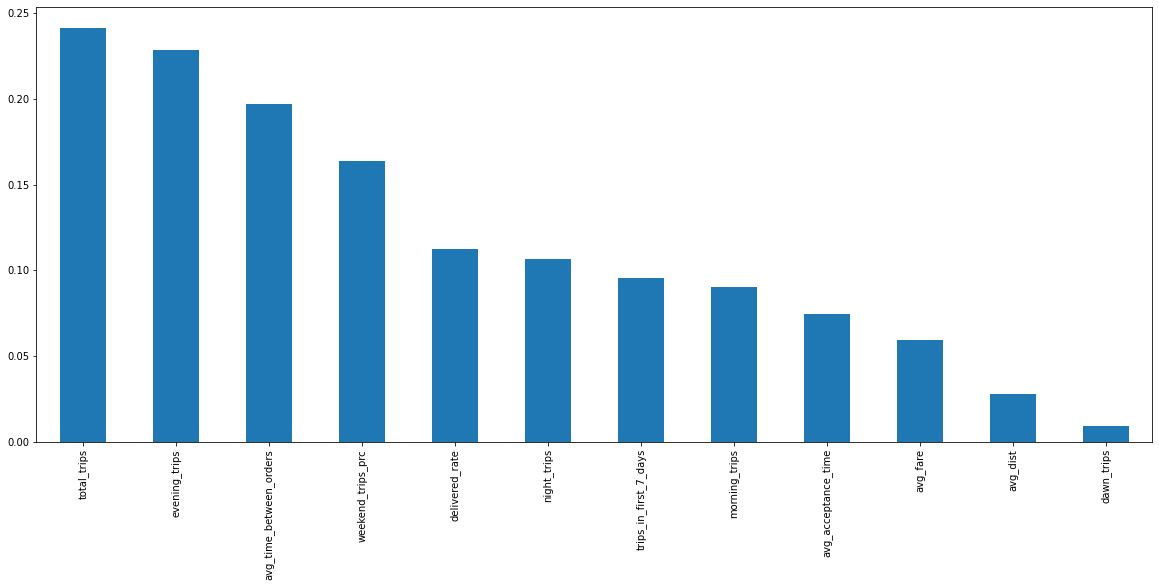

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Here 'total_trips' seem to have comparitively higher significance than other features.

**Perform Chi Squared Test for Categorical Features**

In [ ]:
objects = ['object','bool']
newdf = df.select_dtypes(include=objects)

cols=list(newdf.columns)
cols

['city']

In [ ]:
# Label Encoding these variables

# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'City'. 
for col in cols:
    newdf[col]=label_encoder.fit_transform(newdf[col])

In [ ]:
newdf.head()

,city
0,2
1,0
2,2
3,1
4,2


In [ ]:
y

0       0
1       1
2       1
3       1
4       1
       ..
1358    0
1359    1
1360    1
1361    0
1362    0
Name: churn, Length: 1256, dtype: int64

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(newdf,y)
p_values=pd.Series(f_p_values[1])
p_values.index=newdf.columns
p_values.sort_values(ascending=True)

city   0.51
dtype: float64

Among statisticians a chi square of . 05 is a conventionally accepted threshold of statistical significance. So we can not decide about existance of city with this measure.

**Modelling**

In [ ]:
# ,,,'evening_trips',,'city'
features_selected=['total_trips','trips_in_first_7_days','avg_time_between_orders', 'delivered_rate', 'night_trips','morning_trips']
X= df[features_selected]
X

,total_trips,trips_in_first_7_days,avg_time_between_orders,delivered_rate,night_trips,morning_trips
0,5,2,4.25,0.60,1,0
1,1,1,0.00,1.00,0,0
2,1,0,0.00,1.00,1,0
3,3,3,14.00,1.00,0,0
4,6,3,1.80,1.00,1,0
...,...,...,...,...,...,...
1358,18,11,0.88,1.00,7,0
1359,16,11,0.47,1.00,0,0
1360,5,3,2.00,1.00,0,0
1361,24,11,0.83,1.00,2,1


In [ ]:
y= df['churn']
y

0       0
1       1
2       1
3       1
4       1
       ..
1358    0
1359    1
1360    1
1361    0
1362    0
Name: churn, Length: 1256, dtype: int64

In [ ]:
y.value_counts(normalize=True)


0   0.69
1   0.31
Name: churn, dtype: float64

In [ ]:
#Split the Data to Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

In [ ]:
X_train=pd.get_dummies(X_train,drop_first=True)

X_test=pd.get_dummies(X_test,drop_first=True)

#We want to feed our model with the same columns of the train dataset. The trick is to use the reindex function
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)  

X_train.shape

(1004, 6)

In [ ]:
X_train.head()


,total_trips,trips_in_first_7_days,avg_time_between_orders,delivered_rate,night_trips,morning_trips
325,6,4,2.60,1.00,4,0
975,35,18,0.41,0.94,2,0
945,4,2,2.00,0.75,3,0
707,69,3,0.18,0.93,5,4
13,2,0,28.00,1.00,2,0


In [ ]:
X_train.dtypes

total_trips                  int64
trips_in_first_7_days        int64
avg_time_between_orders    float64
delivered_rate             float64
night_trips                  int64
morning_trips                int64
dtype: object

In [ ]:
objects = ['float64','int64']
newdf = X_train.select_dtypes(include=objects)

cols=list(newdf.columns)
cols

['total_trips',
 'trips_in_first_7_days',
 'avg_time_between_orders',
 'delivered_rate',
 'night_trips',
 'morning_trips']

In [ ]:
# Standardizing the Numerical Columns

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])
X_train

,total_trips,trips_in_first_7_days,avg_time_between_orders,delivered_rate,night_trips,morning_trips
325,-0.33,-0.23,3.52,0.18,-0.09,0.00
975,0.12,0.23,0.12,-1.15,-0.18,0.00
945,-0.36,-0.30,2.59,-5.66,-0.14,0.00
707,0.65,-0.27,-0.24,-1.51,-0.05,2.00
13,-0.39,-0.37,43.00,0.18,-0.18,0.00
...,...,...,...,...,...,...
185,0.14,0.80,-0.12,-1.12,0.50,0.00
652,-0.40,-0.33,-0.52,0.18,-0.23,0.00
254,2.35,2.20,-0.35,0.05,-0.27,4.50
801,1.06,1.17,-0.20,-0.31,-0.18,5.50


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Libraries for Models

from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,f1_score

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 14.03it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.89     0.89      0.90   
BaggingClassifier                  0.90               0.87     0.87      0.90   
XGBClassifier                      0.88               0.86     0.86      0.88   
LinearSVC                          0.85               0.86     0.86      0.85   
DecisionTreeClassifier             0.87               0.85     0.85      0.87   
ExtraTreesClassifier               0.88               0.85     0.85      0.88   
RandomForestClassifier             0.89               0.85     0.85      0.89   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
LogisticRegression                 0.85               0.83     0.83      0.85   
SGDClassifier                      0.81               0.82     0.82      0.81   
Perceptron                  

We can clearly see that the XGBoost and LGBM have a better mean f1 score than LogisticRegression. It would be worth performing a Grid Search on them to further optimize them.

**Perform Grid Search on LGBM**

In [ ]:
lgbm_pipeline = make_pipeline(SMOTE(random_state=42,sampling_strategy='minority'), 
                                 LGBMClassifier(random_state=13))
lgbm_params = {
         'learning_rate': [0.01,0.1],
         'n_estimators': [100],
         'num_leaves': [2,3], # large num_leaves helps improve accuracy but might lead to over-fitting
         'boosting_type' : ['gbdt'],
         'objective' : ['binary'],
         'max_bin':[510, 610], # large max_bin helps improve accuracy but might slow down training progress
         'random_state' : [600],
         'colsample_bytree' : [0.8, 1.0],
         'subsample' : [0.3, 0.4],
        }

new_params = {'lgbmclassifier__' + key: lgbm_params[key] for key in lgbm_params}
grid_lgbm = GridSearchCV(lgbm_pipeline, param_grid=new_params,  scoring='f1',
                        return_train_score=True)
grid_lgbm.fit(X_train, y_train)
print('Best Parameters:',grid_lgbm.best_params_)
print('Best Score:',grid_lgbm.best_score_)

Best Parameters: {'lgbmclassifier__boosting_type': 'gbdt', 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_bin': 610, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__num_leaves': 3, 'lgbmclassifier__objective': 'binary', 'lgbmclassifier__random_state': 600, 'lgbmclassifier__subsample': 0.3}
Best Score: 0.8435277472625973


We oversample the minority(churned bikers which are 30% of our dataset) class using SMOTE.
We use grid search to search exhaustively through specified subset of the hyperparameter space of XGBClassifier algorithm.

Best Parameters: {'lgbmclassifier__boosting_type': 'gbdt', 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_bin': 610, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__num_leaves': 3, 'lgbmclassifier__objective': 'binary', 'lgbmclassifier__random_state': 600, 'lgbmclassifier__subsample': 0.3}
Best Score: 0.8435277472625973
Important Features: [75 29 72  1 12 11]


<AxesSubplot:>

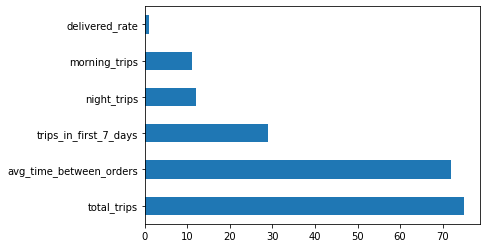

In [ ]:
print('Best Parameters:',grid_lgbm.best_params_)
print('Best Score:',grid_lgbm.best_score_)
important_features = grid_lgbm.best_estimator_._final_estimator.feature_importances_
print('Important Features:',important_features)
important_features_series = pd.Series(important_features, index=X_train.columns)
important_features_series.nlargest(20).plot(kind='barh')

In [ ]:
print('Mean test score: {}'.format(grid_lgbm.cv_results_['mean_test_score'].mean()))
print('Mean train score: {}'.format(grid_lgbm.cv_results_['mean_train_score'].mean()))

Mean test score: 0.7578673626400969
Mean train score: 0.7786038851820558


After fine tuning hyper parameters model is not overfit.




**Perform Grid Search on Gradient Boost**





In [ ]:
xgboost_pipeline = make_pipeline(SMOTE(random_state=42,sampling_strategy='minority'), 
                                 XGBClassifier(random_state=13,eval_metric='mlogloss'))
xgboost_params = {
        'min_child_weight': [1, 3],
        'gamma': [0, 1],
        'learning_rate' : [ 0.01,0.1],
        'subsample': [0.3, 0.4],
        'max_depth': [2, 3],
        'colsample_bytree' : [0.56, 0.57, 0.58],
        'n_estimators':[70],
         'random_state' : [600],
        }

new_params = {'xgbclassifier__' + key: xgboost_params[key] for key in xgboost_params}
grid_xgboost = GridSearchCV(xgboost_pipeline, param_grid=new_params, scoring='f1',
                        return_train_score=True)
grid_xgboost.fit(X_train, y_train)
print('Best Parameters:',grid_xgboost.best_params_)
print('Best Score:',grid_xgboost.best_score_)

Best Parameters: {'xgbclassifier__colsample_bytree': 0.56, 'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 70, 'xgbclassifier__random_state': 600, 'xgbclassifier__subsample': 0.3}
Best Score: 0.8511506442299608


Best Parameters: {'xgbclassifier__colsample_bytree': 0.56, 'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 70, 'xgbclassifier__random_state': 600, 'xgbclassifier__subsample': 0.3}
Best Score: 0.8511506442299608
Important Features: [0.24844387 0.16712382 0.17689592 0.08385487 0.18752691 0.13615458]


<AxesSubplot:>

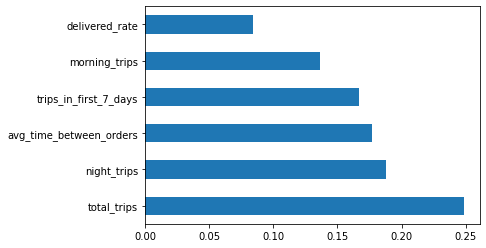

In [ ]:
print('Best Parameters:',grid_xgboost.best_params_)
print('Best Score:',grid_xgboost.best_score_)
important_features = grid_xgboost.best_estimator_._final_estimator.feature_importances_
print('Important Features:',important_features)
important_features_series = pd.Series(important_features, index=X_train.columns)
important_features_series.nlargest(20).plot(kind='barh')


In [ ]:
print('Mean test score: {}'.format(grid_xgboost.cv_results_['mean_test_score'].mean()))
print('Mean train score: {}'.format(grid_xgboost.cv_results_['mean_train_score'].mean()))

Mean test score: 0.7750933747433336
Mean train score: 0.8045324236050888


We can see xgboost has a much higher score than lgbm.

In [ ]:
y_test_predict = grid_xgboost.predict(X_test)
pd.DataFrame(classification_report(y_test, y_test_predict,output_dict=True)).T

,precision,recall,f1-score,support
0,0.90,0.86,0.88,174.00
1,0.71,0.79,0.75,78.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.81,0.83,0.82,252.00
weighted avg,0.84,0.84,0.84,252.00


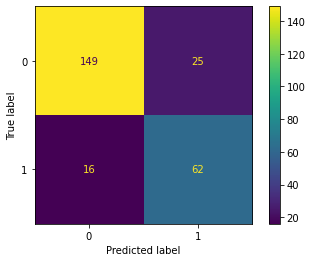

In [ ]:
plot_confusion_matrix(grid_xgboost, X_test, y_test)  
plt.show()

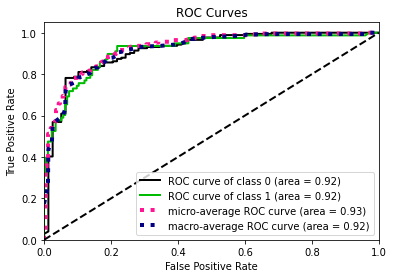

In [ ]:
y_probas=grid_xgboost.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

These results are good with an AUC of 0.92 and F1 score of 0.88 for Class 0(Majority Class) and 0.75 for Class 1(Minority Class).